# Step 1: Importing Libraries

In [39]:
# Data analysis tools
import pandas as pd
import numpy as np

# Data Visualization Tools
import seaborn as sns
import matplotlib.pyplot as plt

# Data Pre-Processing Libraries
from sklearn.preprocessing import LabelEncoder,StandardScaler

# For Train-Test Split
from sklearn.model_selection import train_test_split

# Libraries for various Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Metrics Tools
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score

#For Receiver Operating Characteristic (ROC)
from sklearn.metrics import roc_curve ,roc_auc_score, auc

# Step 2: Loading the Dataset

In [40]:
train = pd.read_csv('train.csv')
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


# Step 3: Understanding the Structure of the Dataset

In [41]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

# Step 4: Data Pre-Processing

   # a) Treating Missing Values

In [42]:
train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

<b> No Missing Values in the dataset. Hence no treatment for missing values required</b>

In [43]:
train.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

# b) Checking Imbalance

C:\Users\dines\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Checking imbalance')

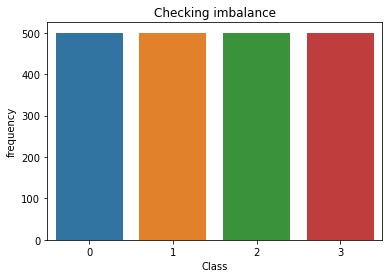

In [44]:
sns.countplot(train["price_range"])
plt.xlabel("Class")
plt.ylabel("frequency")
plt.title("Checking imbalance")

C:\Users\dines\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


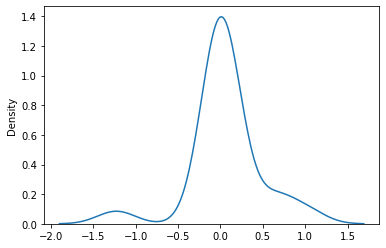

In [45]:
sns.distplot(train.skew(),hist=False)
plt.show()

In [46]:
# Printing interquartile range (IQR) for each column
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

battery_power     763.50
blue                1.00
clock_speed         1.50
dual_sim            1.00
fc                  6.00
four_g              1.00
int_memory         32.00
m_dep               0.60
mobile_wt          61.00
n_cores             4.00
pc                 10.00
px_height         664.50
px_width          758.25
ram              1857.00
sc_h                7.00
sc_w                7.00
talk_time          10.00
three_g             0.00
touch_screen        1.00
wifi                1.00
price_range         1.50
dtype: float64


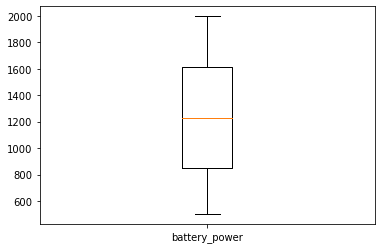

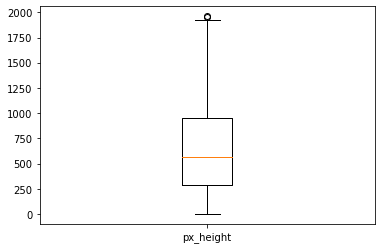

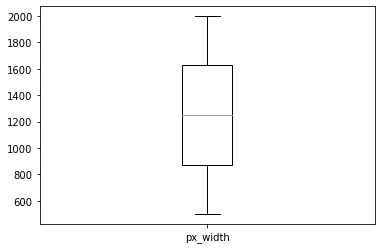

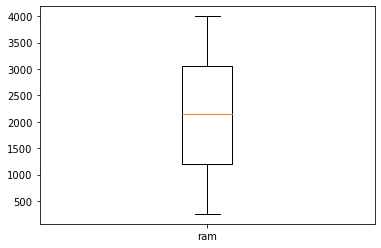

In [47]:
# Boxplot visualization for columns with high IQR

plt.boxplot([train["battery_power"]])
plt.xticks([1],["battery_power"])
plt.show()
plt.boxplot([train["px_height"]])
plt.xticks([1],["px_height"])
plt.show()
plt.boxplot([train["px_width"]])
plt.xticks([1],["px_width"])
plt.show()
plt.boxplot([train["ram"]])
plt.xticks([1],["ram"])
plt.show()

The outliers are very low. Hence, we dont need to treat any outliers.

# Step 5: Data Visualization

In [48]:
train.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


<AxesSubplot:>

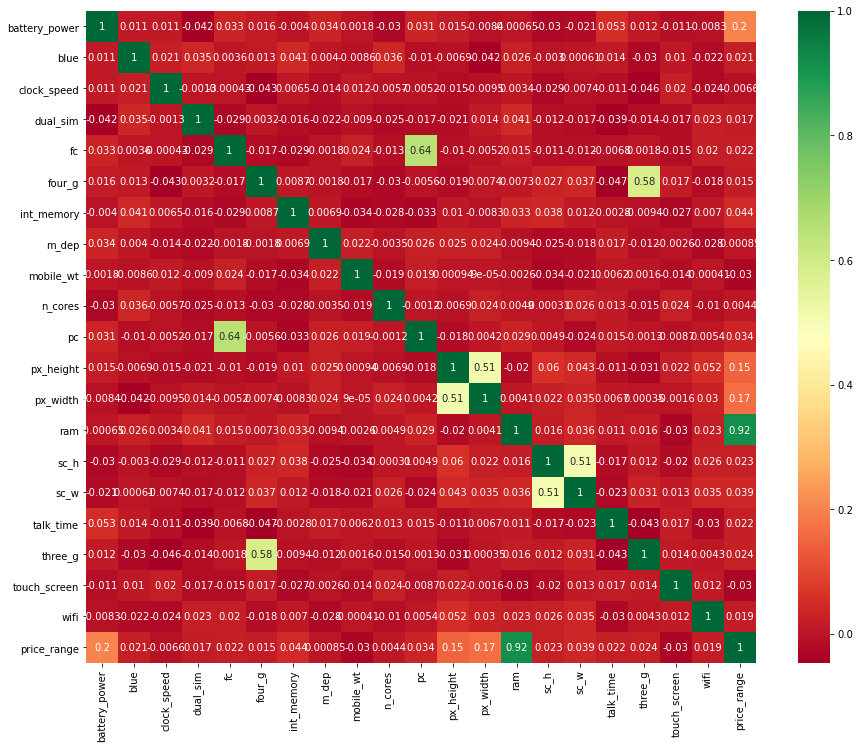

In [49]:
fig = plt.figure(figsize=(15,12))
sns.heatmap(train.corr(),cmap = "RdYlGn", annot = True)

In [50]:
train['price_range'].unique()

array([1, 2, 3, 0], dtype=int64)

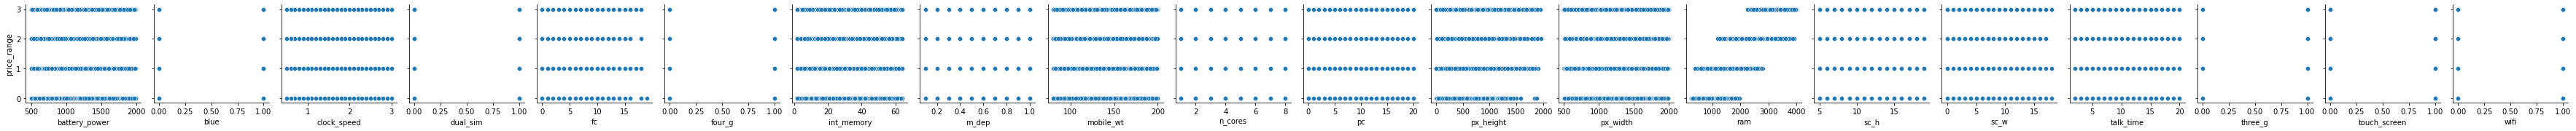

In [110]:
import seaborn as sns
sns.pairplot(data=train,y_vars=['price_range'],x_vars=['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'])

In [52]:
corr_matrix=train.corr()
corr_matrix['price_range']

battery_power    0.200723
blue             0.020573
clock_speed     -0.006606
dual_sim         0.017444
fc               0.021998
four_g           0.014772
int_memory       0.044435
m_dep            0.000853
mobile_wt       -0.030302
n_cores          0.004399
pc               0.033599
px_height        0.148858
px_width         0.165818
ram              0.917046
sc_h             0.022986
sc_w             0.038711
talk_time        0.021859
three_g          0.023611
touch_screen    -0.030411
wifi             0.018785
price_range      1.000000
Name: price_range, dtype: float64

C:\Users\dines\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


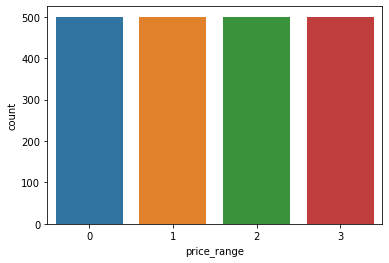

In [53]:
sns.countplot(train['price_range'])
plt.show()

C:\Users\dines\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price_range', ylabel='talk_time'>

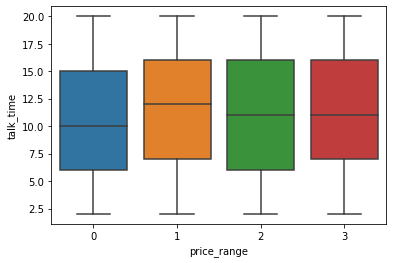

In [54]:
sns.boxplot(train['price_range'],train['talk_time'])

<b>How does ram is affected by price</b>

<AxesSubplot:xlabel='ram', ylabel='price_range'>

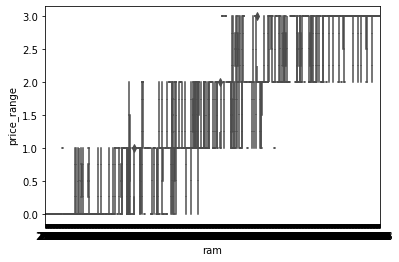

In [55]:
sns.boxplot(x='ram',y='price_range',data=train,color='red')

Internal Memory vs Price Range

<AxesSubplot:xlabel='price_range', ylabel='int_memory'>

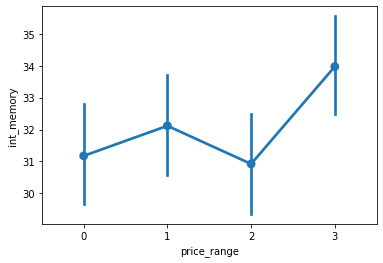

In [56]:
sns.pointplot(y="int_memory", x="price_range", data=train)

<b>3G supporting Phones vs Non supporting Phones</b>

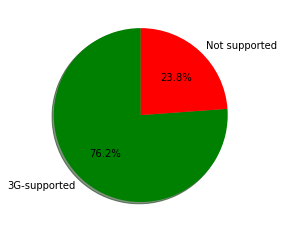

In [57]:
labels = ["3G-supported",'Not supported']
values=train['three_g'].value_counts().values
colors = ['green', 'red']
_, ax = plt.subplots()
ax.pie(values, labels=labels,colors=colors, autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

<b>4G supporting Phones vs Non supporting Phones</b>

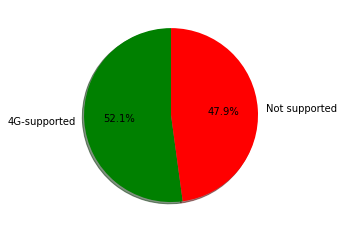

In [58]:
labels = ["4G-supported",'Not supported']
values=train['four_g'].value_counts().values
colors = ['green', 'red']
_, ax = plt.subplots()
ax.pie(values, labels=labels,colors=colors, autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

<b> No of Phones vs Camera megapixels of front and primary camera</b>

Text(0.5, 0, 'MegaPixels')

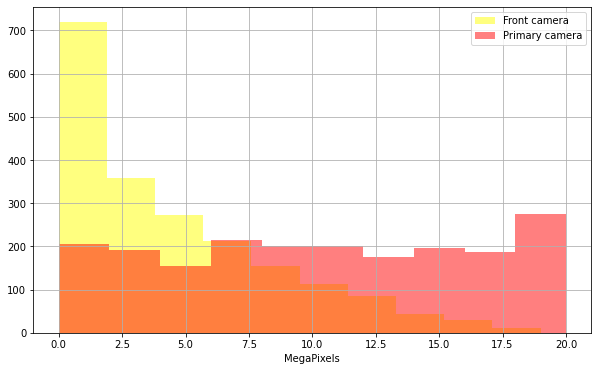

In [59]:
plt.figure(figsize=(10,6))
train['fc'].hist(alpha=0.5,color='yellow',label='Front camera')
train['pc'].hist(alpha=0.5,color='red',label='Primary camera')
plt.legend()
plt.xlabel('MegaPixels')

<b> Talk time vs Price range</b>

<AxesSubplot:xlabel='price_range', ylabel='talk_time'>

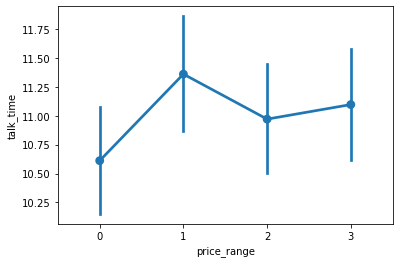

In [60]:
sns.pointplot(y="talk_time", x="price_range", data=train)

# Step 6: Defining the Tatget and Predictor Variables and Standard Scaling

In [61]:
scaler = StandardScaler()

<b> Selecting the Dependent and Independent variables and Scaling all the values </b>

In [62]:
X=train.drop('price_range',axis=1)
y=train['price_range']

scaler.fit(X)
x = scaler.transform(X)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=0)

# Step 7: Fitting the dataset to various models

<b>We will fit the dataset to various models and find out the best fit model among these.

Various models used in this notebook are:

1)  KNN                

2)  Naive-Bayes       

3)  SVM                   

4)  Decision Tree         

5)  Gradient Boosting     

6)  Random Forest         

7)  AdaBoost             

8)  XGBoost    

</b>           

# 1) KNN

In [63]:
#Fitting the model

knn = KNeighborsClassifier(n_neighbors=35)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=35)

In [64]:
# Applying the model to the x_test

pred_knn = knn.predict(x_test)

In [65]:
# Finding Accuracy

KNN = accuracy_score(y_test,pred_knn)*100

In [66]:
# Confusion Matrix

cm_knn=confusion_matrix(y_test,pred_knn)
print(cm_knn)

[[113  36   2   0]
 [ 39  69  27   0]
 [  2  54  78  17]
 [  0   6  50 107]]


In [67]:
# Classification Report that computes various
# metrics like Precision, Recall and F1 Score

print(classification_report(pred_knn,y_test))

              precision    recall  f1-score   support

           0       0.75      0.73      0.74       154
           1       0.51      0.42      0.46       165
           2       0.52      0.50      0.51       157
           3       0.66      0.86      0.75       124

    accuracy                           0.61       600
   macro avg       0.61      0.63      0.61       600
weighted avg       0.60      0.61      0.60       600



# 2) Naive-Bayes

In [68]:
#Fitting the model

gnb=GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [69]:
# Applying the model to the x_test

pred_gnb = gnb.predict(x_test)

In [70]:
# Finding Accuracy

GNB = accuracy_score(y_test,pred_gnb)*100

In [71]:
# Confusion Matrix

cm_gnb=confusion_matrix(y_test,pred_gnb)
print(cm_gnb)

[[139  12   0   0]
 [  9 100  26   0]
 [  0  26 108  17]
 [  0   0  14 149]]


In [72]:
# Classification Report that computes various 
# metrics like Precision, Recall and F1 Score

print(classification_report(y_test,pred_gnb))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       151
           1       0.72      0.74      0.73       135
           2       0.73      0.72      0.72       151
           3       0.90      0.91      0.91       163

    accuracy                           0.83       600
   macro avg       0.82      0.82      0.82       600
weighted avg       0.83      0.83      0.83       600



# 3) SVM

In [73]:
#Fitting the model

svc = SVC(probability=True)
svc.fit(x_train,y_train)

# Applying the model to the x_test
pred_svc = svc.predict(x_test)

In [74]:
# Finding Accuracy

SVC = accuracy_score(y_test,pred_svc)*100

In [75]:
# Confusion Matrix

cm_svc=confusion_matrix(y_test,pred_svc)
print(cm_svc)

[[143   8   0   0]
 [ 10 116   9   0]
 [  0  18 129   4]
 [  0   0  18 145]]


In [76]:
# Classification Report that computes various 
#metrics like Precision, Recall and F1 Score

print(classification_report(y_test,pred_svc))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       151
           1       0.82      0.86      0.84       135
           2       0.83      0.85      0.84       151
           3       0.97      0.89      0.93       163

    accuracy                           0.89       600
   macro avg       0.89      0.89      0.89       600
weighted avg       0.89      0.89      0.89       600



# 4) Decision Tree

In [77]:
#Fitting the model

dtree_en = DecisionTreeClassifier()
clf = dtree_en.fit(x_train,y_train)

In [78]:
# Applying the model to the x_test

pred_dt = clf.predict(x_test)

In [79]:
# Finding Accuracy

DTREE = accuracy_score(y_test,pred_dt)*100

In [80]:
# Confusion Matrix

cm_dt=confusion_matrix(y_test,pred_dt)
print(cm_dt)

# Classification Report that computes various 
# metrics like Precision, Recall and F1 Score

print(classification_report(y_test,pred_dt))

[[131  20   0   0]
 [ 12 108  15   0]
 [  0  16 116  19]
 [  0   1  18 144]]
              precision    recall  f1-score   support

           0       0.92      0.87      0.89       151
           1       0.74      0.80      0.77       135
           2       0.78      0.77      0.77       151
           3       0.88      0.88      0.88       163

    accuracy                           0.83       600
   macro avg       0.83      0.83      0.83       600
weighted avg       0.83      0.83      0.83       600



# 5) Gradient Boosting

In [81]:
#Fitting the model

GBC=GradientBoostingClassifier(n_estimators=150)
GBC.fit(x_train,y_train)

GradientBoostingClassifier(n_estimators=150)

In [82]:
# Applying the model to the x_test

Y_predict=GBC.predict(x_test)

In [83]:
# Finding Accuracy

gbc = accuracy_score(y_test,Y_predict)*100

In [84]:
# Confusion Matrix

cm_gbc=confusion_matrix(y_test,Y_predict)
print(cm_gbc)

# Classification Report that computes various 
# metrics like Precision, Recall and F1 Score

print(classification_report(y_test,Y_predict))

[[145   6   0   0]
 [  5 118  12   0]
 [  0  10 131  10]
 [  0   0   8 155]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       151
           1       0.88      0.87      0.88       135
           2       0.87      0.87      0.87       151
           3       0.94      0.95      0.95       163

    accuracy                           0.92       600
   macro avg       0.91      0.91      0.91       600
weighted avg       0.91      0.92      0.91       600



# 6) Random Forest

In [85]:
#Fitting the model

rfc = RandomForestClassifier(n_estimators=30,criterion='gini',random_state=1,max_depth=10)
rfc.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=30, random_state=1)

In [86]:
# Applying the model to the x_test

pred_rf= rfc.predict(x_test)

In [87]:
# Finding Accuracy

RFC = accuracy_score(y_test,pred_rf)*100

In [88]:
# Confusion Matrix

cm_rf=confusion_matrix(y_test,pred_rf)
print(cm_rf)

[[144   7   0   0]
 [  9 114  12   0]
 [  0  19 110  22]
 [  0   0  10 153]]


In [89]:
# Classification Report that computes various 
# metrics like Precision, Recall and F1 Score

print(classification_report(y_test,pred_rf))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       151
           1       0.81      0.84      0.83       135
           2       0.83      0.73      0.78       151
           3       0.87      0.94      0.91       163

    accuracy                           0.87       600
   macro avg       0.87      0.87      0.86       600
weighted avg       0.87      0.87      0.87       600



# 7) AdaBoost (Entropy-Decision Tree)

In [90]:
#Fitting the model. Base model is chosen to be Decision Tree

model = DecisionTreeClassifier(criterion='entropy',max_depth=1,random_state=0)
adaboost = AdaBoostClassifier(n_estimators=80, base_estimator=model,random_state=0)
adaboost.fit(x_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         max_depth=1,
                                                         random_state=0),
                   n_estimators=80, random_state=0)

In [91]:
# Applying the model to the x_test

pred = adaboost.predict(x_test)

In [92]:
# Finding Accuracy

ada = accuracy_score(y_test,pred)*100

In [93]:
# Confusion Matrix

cm_ada=confusion_matrix(y_test,pred)
print(cm_ada)

# Classification Report that computes various 
# metrics like Precision, Recall and F1 Score

print(classification_report(y_test,pred))

[[ 80  71   0   0]
 [ 14  96  25   0]
 [  0  22 107  22]
 [  0   0  61 102]]
              precision    recall  f1-score   support

           0       0.85      0.53      0.65       151
           1       0.51      0.71      0.59       135
           2       0.55      0.71      0.62       151
           3       0.82      0.63      0.71       163

    accuracy                           0.64       600
   macro avg       0.68      0.64      0.64       600
weighted avg       0.69      0.64      0.65       600



# 8) XGBoost 

In [94]:
#Fitting the model

xgb =  XGBClassifier(learning_rate =0.000001,n_estimators=1000,max_depth=5,min_child_weight=1,
                     subsample=0.8,colsample_bytree=0.8,nthread=4,scale_pos_weight=1,seed=27)
xgb.fit(x_train, y_train)

[20:50:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "scale_pos_weight" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:50:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\dines\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=1e-06, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=4, nthread=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=27, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=27, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [95]:
# Applying the model to the x_test


predxg = xgb.predict(x_test)

# Finding Accuracy
xg = accuracy_score(y_test,predxg)*100


In [96]:
# Confusion Matrix

cm_xg=confusion_matrix(y_test,predxg)
print(cm_xg)

# Classification Report that computes various 
# metrics like Precision, Recall and F1 Score

print(classification_report(y_test,predxg))

[[138  13   0   0]
 [  9 110  16   0]
 [  0  20 114  17]
 [  0   0  16 147]]
              precision    recall  f1-score   support

           0       0.94      0.91      0.93       151
           1       0.77      0.81      0.79       135
           2       0.78      0.75      0.77       151
           3       0.90      0.90      0.90       163

    accuracy                           0.85       600
   macro avg       0.85      0.85      0.85       600
weighted avg       0.85      0.85      0.85       600



# Accuracy Reports

In [97]:
# Accuracy values for all the models
print("1)  KNN                    :",round(KNN, 2))
print("2)  Naive-Bayes            :",round(GNB, 2))
print("3)  SVM                    :",round(SVC, 2))
print("4)  Decision Tree          :",round(DTREE, 2))
print("5)  Gradient Boosting      :",round(gbc, 2))
print("6)  Random Forest          :",round(RFC, 2))
print("7)  AdaBoost               :",round(ada, 2))
print("8)  XGBoost                :",round(xg, 2))

1)  KNN                    : 61.17
2)  Naive-Bayes            : 82.67
3)  SVM                    : 88.83
4)  Decision Tree          : 83.17
5)  Gradient Boosting      : 91.5
6)  Random Forest          : 86.83
7)  AdaBoost               : 64.17
8)  XGBoost                : 84.83


1)  Gradient Boosting      : 91.50 %

2)  SVM                    : 88.83 %

3)  Random Forest          : 86.83 %

4)  XGBoost                : 84.83 %

5)  Decision Tree          : 82.67 %

6)  Naive-Bayes            : 82.67 %

7)  AdaBoost               : 64.17 %

8)  KNN                    : 61.17 %

Here, <b>Gradient Boosting has the highest accuracy rate.

Hence the best fit Model is Gradient Boosting</b> 

# Step 8: Applying the Best fit model to the test.csv file

In [100]:
test = pd.read_csv('test.csv')
test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [101]:
test = test.drop('id',axis=1) 
scaler.fit(test)
x = scaler.transform(test)

In [102]:
price = GBC.predict(x)

In [103]:
print(price)

[3 3 2 3 1 3 3 1 3 0 3 3 0 0 2 0 2 1 3 2 1 3 1 1 3 0 2 0 3 0 2 0 3 0 0 1 3
 1 2 1 1 2 0 0 0 1 0 3 1 2 1 0 3 0 3 1 3 1 1 3 3 2 0 2 1 1 2 3 1 2 1 2 2 3
 3 0 2 0 2 3 1 3 3 0 3 0 3 1 3 0 1 2 2 0 2 2 0 2 1 2 1 0 0 3 0 2 0 1 2 3 3
 2 1 3 3 3 3 2 3 0 0 3 2 1 1 0 3 2 3 1 0 2 1 1 3 1 1 0 3 2 1 2 1 2 2 3 3 2
 2 3 2 3 0 0 3 2 3 3 3 3 2 2 3 3 3 3 1 0 3 0 0 0 1 0 0 1 0 0 1 2 0 0 0 0 2
 2 2 1 0 0 0 1 0 3 2 0 2 2 2 3 1 2 3 3 3 2 2 1 0 0 1 2 0 2 3 3 0 2 0 3 2 3
 3 1 0 1 0 3 0 1 0 2 2 1 2 0 3 0 3 1 2 0 0 2 1 3 3 3 1 1 3 0 0 2 3 3 1 3 1
 1 3 2 1 2 3 3 3 1 0 0 2 3 1 1 3 2 0 3 0 1 2 1 0 3 2 3 3 2 1 3 3 2 3 2 2 1
 2 0 3 3 1 0 0 3 0 3 0 1 2 0 2 3 1 3 2 2 1 2 0 0 0 1 3 2 0 0 0 3 2 0 2 3 0
 2 2 2 3 1 3 3 2 2 3 3 3 0 3 1 3 1 3 1 3 3 0 1 1 3 1 3 2 3 0 0 0 0 2 0 0 2
 2 1 2 2 2 0 1 0 0 3 2 0 3 1 2 2 1 2 3 1 1 2 2 1 2 0 1 1 0 3 2 0 0 1 0 0 1
 1 0 0 0 2 2 3 2 3 0 3 0 3 0 1 1 1 1 0 3 2 3 3 1 3 1 3 1 3 2 1 2 2 1 1 0 0
 0 1 2 1 0 3 2 0 2 2 0 0 3 1 1 0 2 2 3 0 3 0 2 3 2 3 0 2 0 2 2 0 1 2 0 0 1
 1 1 3 3 3 2 3 1 1 2 2 3 

In [104]:
test["price_range"]=price

In [105]:
test.to_csv('Submission_Price_Detection.csv')

# Step 9: View Predictions

In [106]:
submission = pd.read_csv('./Submission_Price_Detection.csv')

In [107]:
submission.head()

,Unnamed: 0,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,0,1043,1,1.8,1,14,0,5,0.1,193,...,226,1412,3476,12,7,2,0,1,0,3
1,1,841,1,0.5,1,4,1,61,0.8,191,...,746,857,3895,6,0,7,1,0,0,3
2,2,1807,1,2.8,0,1,0,27,0.9,186,...,1270,1366,2396,17,10,10,0,1,1,2
3,3,1546,0,0.5,1,18,1,25,0.5,96,...,295,1752,3893,10,0,7,1,1,0,3
4,4,1434,0,1.4,0,11,1,49,0.5,108,...,749,810,1773,15,8,7,1,0,1,1
